## Importing Data from SQLIte Database
---

In [1]:
import sqlite3
import pandas as pd
from IPython.display import display, Markdown

# Connect to SQLite database
conn    = sqlite3.connect('adzuna_jobs.db')

# Read a table into a dataframe
jobs_df = pd.read_sql_query("SELECT * FROM jobs", conn)

# close the connection
conn.close()

# Shape and Preview
display(Markdown('### Jobs Dataframe'))
display(jobs_df.head())
display(Markdown('---'))
display(Markdown('Descriptive Statistics'))
display(jobs_df.describe())
display(Markdown('---'))
display(Markdown('Missing Values'))
display(jobs_df.isnull().sum())
display(Markdown('---'))
display(Markdown('Data Types'))
display(jobs_df.dtypes)
display(Markdown('---'))
display(Markdown('Shape'))
display(jobs_df.shape)


### Jobs Dataframe

,id,title,company,area_list,location,category,salary_max,salary_min,salary_is_predicted,latitude,longitude,contract_type,contract_time,description,created,redirect_url
0,5310740788,Data Analyst,Cedar Recruitment,"[""UK"", ""London""]","London, UK",IT Jobs,50000.0,50000.0,0,NaN,NaN,permanent,None,Data Analyst (Sports betting sector experience...,2025-07-18T22:35:04Z,https://www.adzuna.co.uk/jobs/land/ad/53107407...
1,5311386740,Data Analyst,Halian Technology Limited,"[""UK"", ""London"", ""East London"", ""Poplar""]","Poplar, East London",IT Jobs,117000.0,104000.0,0,51.504431,-0.014588,contract,None,Halian Technology are currently recruiting a D...,2025-07-19T02:47:37Z,https://www.adzuna.co.uk/jobs/land/ad/53113867...
2,5297811155,Data Analyst,Bernecker's Nursery,"[""UK"", ""London"", ""East London"", ""Canning Town""]","Canning Town, East London",Part time Jobs,93600.0,93600.0,0,51.508202,0.035485,permanent,part_time,Description We are seeking a skilled Data Anal...,2025-07-11T16:04:33Z,https://www.adzuna.co.uk/jobs/details/52978111...
3,5307578659,Pension System Calculation and Data Analyst,Morson Talent,"[""UK"", ""London"", ""Central London"", ""Blackfriars""]","Blackfriars, Central London",Accounting & Finance Jobs,55000.0,55000.0,0,51.515704,-0.104021,permanent,None,Pension System Calculation and Data Analyst Lo...,2025-07-17T02:46:22Z,https://www.adzuna.co.uk/jobs/land/ad/53075786...
4,5310220101,Data Analyst,Cedar,"[""UK"", ""London""]","London, UK",IT Jobs,50000.0,50000.0,0,NaN,NaN,permanent,full_time,Data Analyst (Sports betting sector experience...,2025-07-18T20:58:40Z,https://www.adzuna.co.uk/jobs/land/ad/53102201...


---

Descriptive Statistics

,salary_max,salary_min,latitude,longitude
count,2934.000000,2938.000000,1821.000000,1821.000000
mean,123035.962427,108807.070374,39.914112,-88.934148
std,69582.352442,51929.274278,5.072294,40.479143
min,26.000000,0.000000,32.721100,-122.749887
25%,67200.272500,64195.987500,37.390494,-121.952999
50%,111789.575000,104749.360000,37.928543,-117.164709
75%,159087.292500,141907.595000,40.755381,-73.975280
max,728000.000000,414000.000000,51.652100,0.098600


---

Missing Values

id                        0
title                     0
company                  18
area_list                 0
location                  0
category                  0
salary_max                4
salary_min                0
salary_is_predicted       0
latitude               1117
longitude              1117
contract_type          2499
contract_time          1630
description               0
created                   0
redirect_url              0
dtype: int64

---

Data Types

id                      object
title                   object
company                 object
area_list               object
location                object
category                object
salary_max             float64
salary_min             float64
salary_is_predicted     object
latitude               float64
longitude              float64
contract_type           object
contract_time           object
description             object
created                 object
redirect_url            object
dtype: object

---

Shape

(2938, 16)

## Exploratory Data Analysis
1. Shape and preview.
2. Basic profiling.
3. Job posting trend over time.
4. Strip area to have a general area view.
5. Inspect description to acquire requirements and respnsibilities.
---

In [2]:
import ast # The ast library parses a string that represents a Python literal(e.g. list, dict, string, number etc.) and converts it to the actual python object it represents.
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Unique values
print(f'Number of locations: {jobs_df['company'].nunique()}')
print(f'\nNumber of categories: {jobs_df['category'].nunique()}, \n unique categories are: \n{jobs_df['category'].unique()}')
print(f"\nNumer of companies: {jobs_df['company'].nunique()}")
print(f'\nNumber of titles: {jobs_df['title'].nunique()}')
print(f'\nNumber of contract types: {jobs_df['contract_type'].nunique()}, \n unique categories are: \n{jobs_df['contract_type'].unique()}')
print(f'\nNumber of contract times: {jobs_df['contract_time'].nunique()}, \n unique categories are: \n{jobs_df['contract_time'].unique()}')

Number of locations: 1411

Number of categories: 22, 
 unique categories are: 
['IT Jobs' 'Part time Jobs' 'Accounting & Finance Jobs'
 'PR, Advertising & Marketing Jobs' 'Graduate Jobs' 'Scientific & QA Jobs'
 'Admin Jobs' 'Trade & Construction Jobs' 'Consultancy Jobs' 'Retail Jobs'
 'HR & Recruitment Jobs' 'Legal Jobs' 'Energy, Oil & Gas Jobs'
 'Healthcare & Nursing Jobs' 'Maintenance Jobs' 'Manufacturing Jobs'
 'Teaching Jobs' 'Engineering Jobs' 'Customer Services Jobs'
 'Other/General Jobs' 'Sales Jobs' 'Creative & Design Jobs']

Numer of companies: 1411

Number of titles: 1282

Number of contract types: 2, 
 unique categories are: 
['permanent' 'contract' None]

Number of contract times: 2, 
 unique categories are: 
[None 'part_time' 'full_time']


In [4]:
# Feature engineering the area column
jobs_df['area'] = jobs_df['area_list'].apply(lambda x : ast.literal_eval(x)[1] if x else None)
jobs_df['area'].value_counts()

area
California    998
London        959
New York      864
New Jersey    117
Name: count, dtype: int64

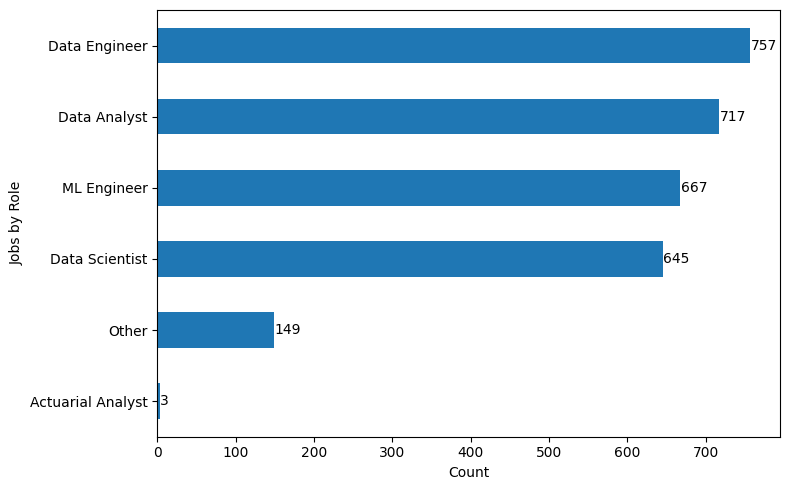

In [5]:
# Feature engineering roles to reduce titles
def classify_role(title):
    title = title.lower()

    if re.search(r'\bdata\b', title) and re.search(r'\b(science|scientist)\b', title):
        return 'Data Scientist'
    elif re.search(r'\bdata\b', title) and re.search(r'\b(analyst|analysis)\b', title):
        return 'Data Analyst'
    elif re.search(r'\bdata\b', title) and re.search(r'\b(engineering|engineer)\b', title):
        return 'Data Engineer'        
    elif re.search(r'\b(machine|ml|ai)\b', title) and re.search(r'\b(engineering|engineer|learning)\b', title):
        return 'ML Engineer'
    elif re.search(r'(actuarial|actuary)', title):
        return 'Actuarial Analyst'
    else:
        return 'Other'


jobs_df['role'] = jobs_df['title'].apply(classify_role)
jobs_df['role'].value_counts()

jobs_by_role = jobs_df['role'].value_counts(ascending=True)
ax = jobs_by_role.plot(kind='barh', figsize=(8,5))

# Add text label to each bar
for i, v in enumerate(jobs_by_role):
    ax.text(v+1, i, str(v), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Jobs by Role')
plt.tight_layout()
plt.show()

In [6]:
# other_jobs = jobs_df[jobs_df['role'] == 'Other']
# other_jobs.head(50)

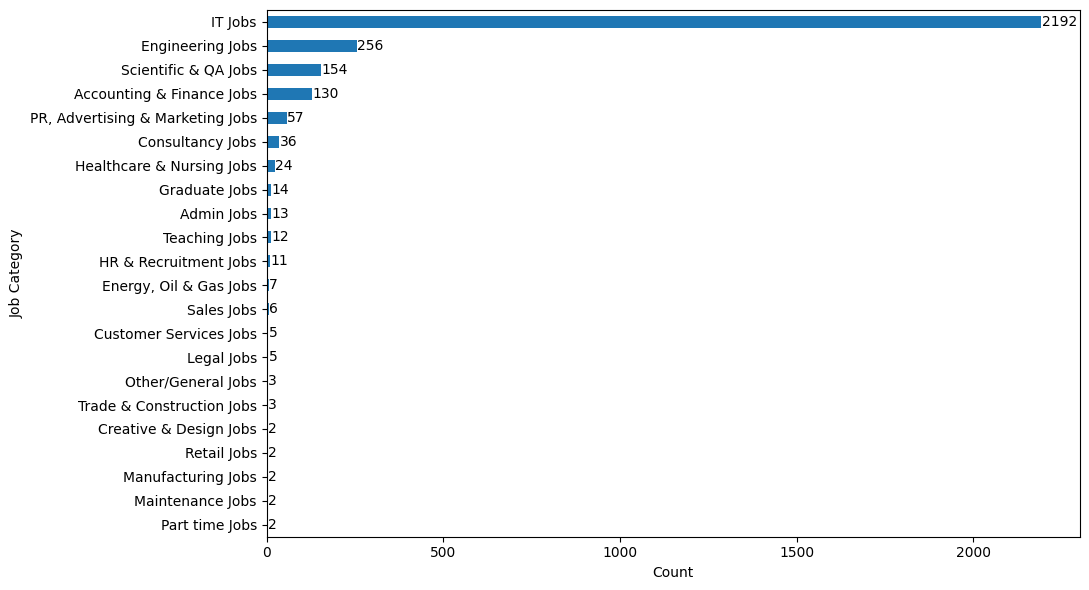

In [7]:
jobs_by_category = jobs_df['category'].value_counts(ascending=True)
ax = jobs_by_category.plot(kind='barh', figsize=(11,6))

for i, v in enumerate(jobs_by_category):
    ax.text(v+1, i, str(v), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()

In [8]:
# Feature engineering average salary
jobs_df['salary_avg'] = (jobs_df['salary_min'] + jobs_df['salary_max'])/2

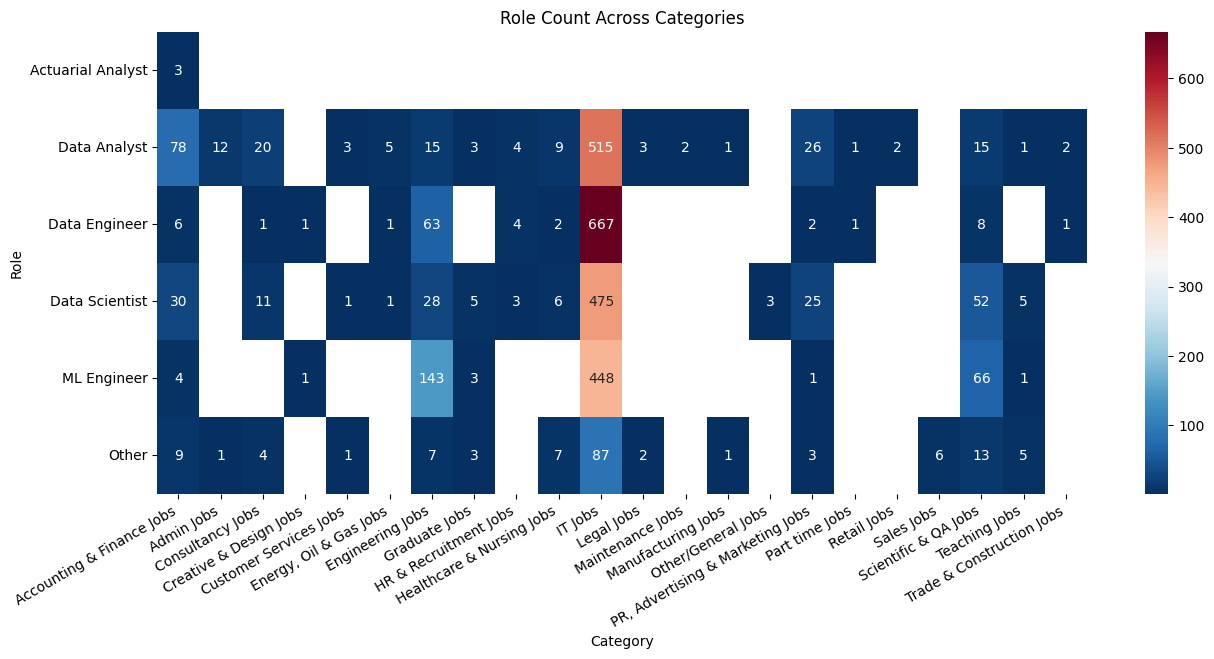

In [9]:
pivot = jobs_df.pivot_table(index='role', columns='category', values='id', aggfunc='count')
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(pivot, annot=True, cmap='RdBu_r', ax=ax, fmt='.0f')

plt.xlabel('Category')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Role')
plt.title('Role Count Across Categories')
plt.show()

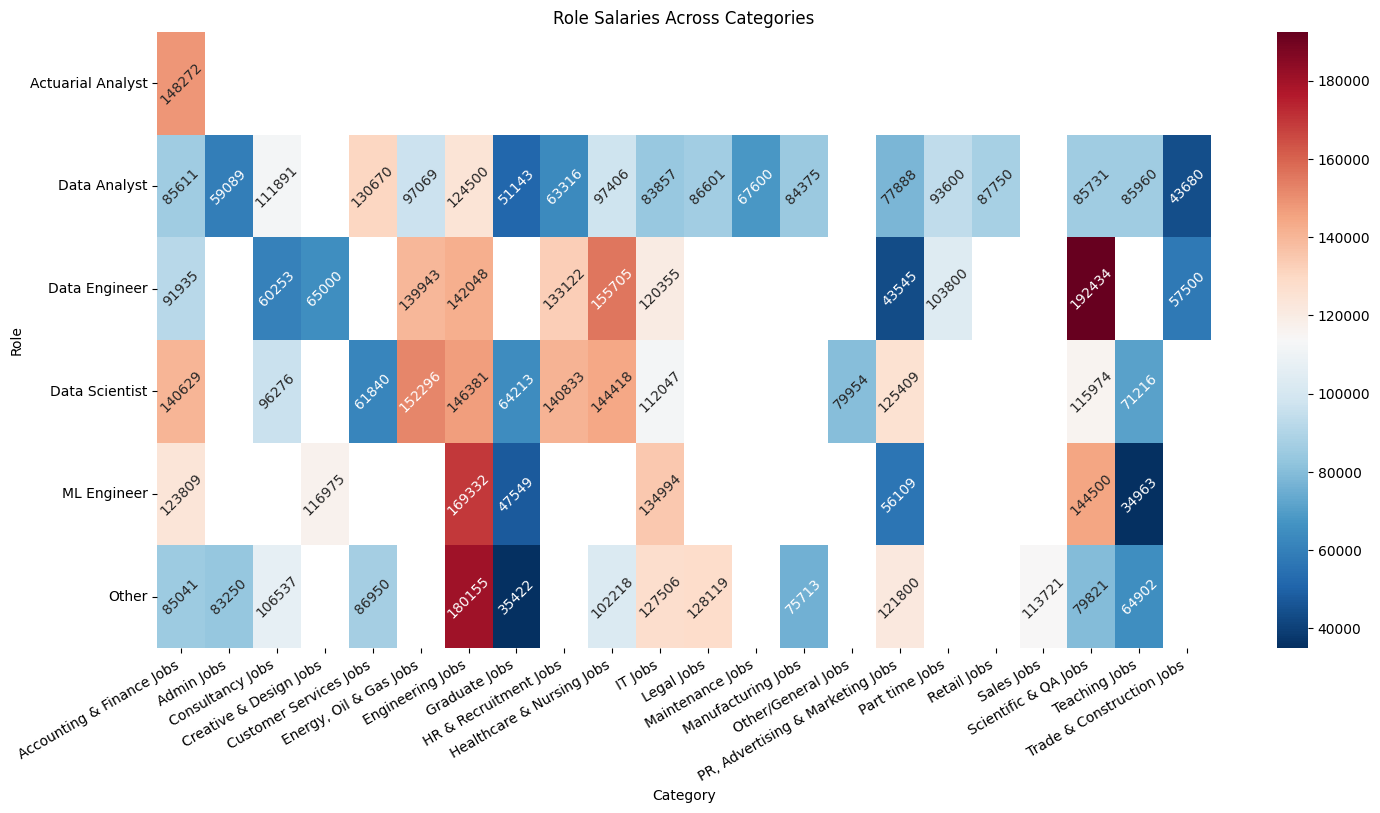

In [10]:
pivot = jobs_df.pivot_table(index='role', columns='category', values='salary_avg', aggfunc='mean')
fig, ax = plt.subplots(figsize=(17,8))
sns.heatmap(pivot, fmt='.0f', cmap='RdBu_r', annot=True, ax=ax
    , annot_kws={
        'rotation' : 45
    })
plt.xlabel('Category')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Role')
plt.title('Role Salaries Across Categories')
plt.show()

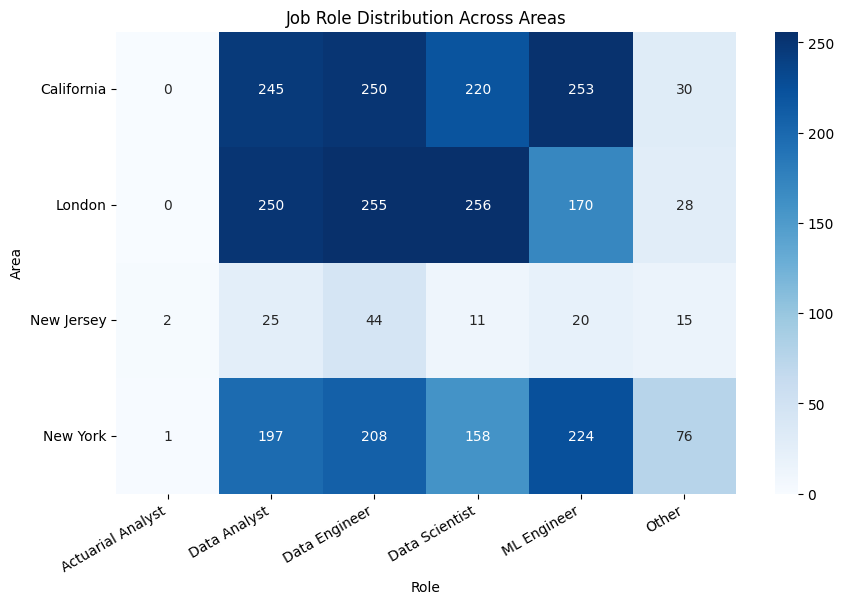

In [11]:
heatmap_data = jobs_df.pivot_table(index='area', columns='role', values='id', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.0f', ax=ax)
plt.title("Job Role Distribution Across Areas")
plt.xlabel("Role")
plt.xticks(rotation=30, ha='right')
plt.ylabel("Area")
plt.yticks(rotation=0)
plt.show()


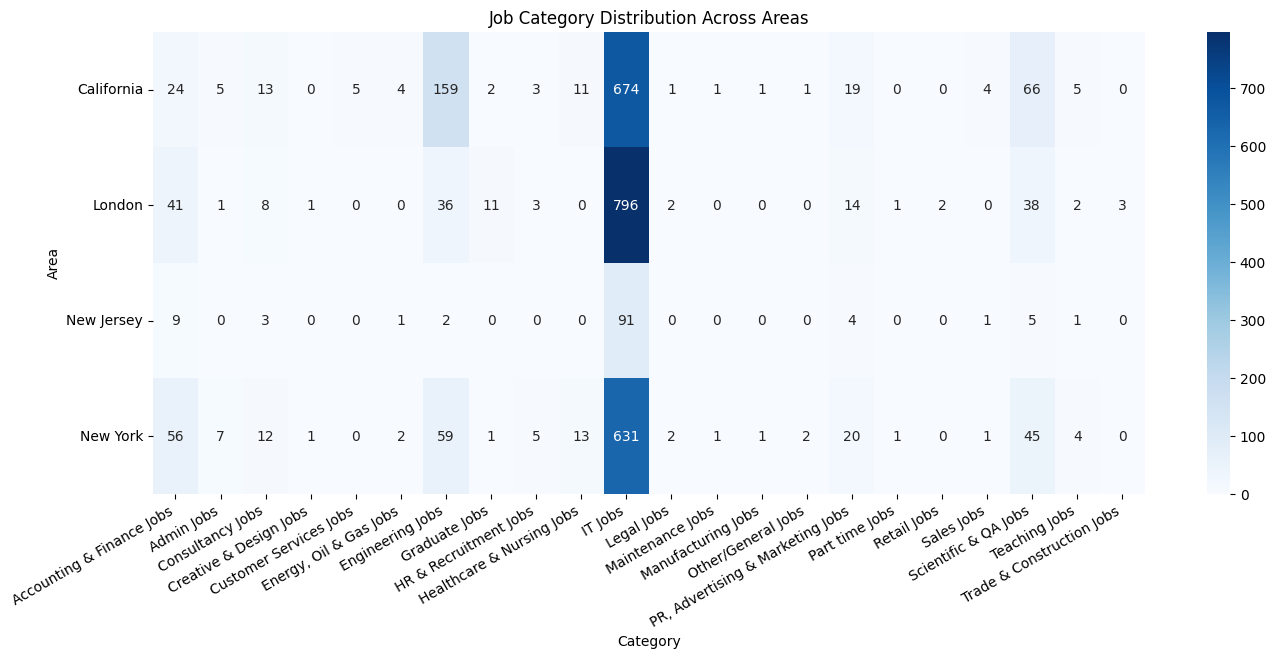

In [12]:
heatmap_data = jobs_df.pivot_table(index='area', columns='category', values='id', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.0f', ax=ax)
plt.title("Job Category Distribution Across Areas")
plt.xlabel("Category")
plt.xticks(rotation=30, ha='right')
plt.ylabel("Area")
plt.yticks(rotation=0)
plt.show()
